<center> <h1>Modèle de  régression logistique</h1> </center>

In [1]:
#importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from optbinning import OptimalBinning
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import roc_curve, roc_auc_score,auc
import statsmodels.api as sm 
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import log_loss
import scipy.stats as stats

(CVXPY) Oct 27 06:56:48 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Oct 27 06:56:48 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
#Importation du jeu de données d'entrainement
data_train=pd.read_csv("data/train_missing.csv",sep=',')

In [3]:
#Importation du jeu de données de test

data_test=pd.read_csv("data/test_missing.csv",sep=',')

La base de données de test(data_test a 1788 observations et 13 variables) et la base de données d'entrainement a 4172 observations et 13 variables

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4172 non-null   int64  
 1   LOAN     4172 non-null   int64  
 2   MORTDUE  4172 non-null   float64
 3   VALUE    4172 non-null   float64
 4   REASON   4172 non-null   object 
 5   JOB      4172 non-null   object 
 6   YOJ      4172 non-null   float64
 7   DEROG    4172 non-null   int64  
 8   DELINQ   4172 non-null   int64  
 9   CLAGE    4172 non-null   float64
 10  NINQ     4172 non-null   int64  
 11  CLNO     4172 non-null   int64  
 12  DEBTINC  4172 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage: 423.8+ KB


Dans le cadre du modèle de régression logistique, nous transformons toutes les variables quantitatives en variables catégorielles en les discrétisant. Cette approche consiste à diviser les variables continues en groupes distincts, facilitant ainsi l'interprétation du modèle et sa performance.

Discrétisation des variables quantitatives

In [5]:
#Variablecontinue à discrétiser
variables = ['LOAN','MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC','DEROG', 'NINQ', 'DELINQ']


On va discrétiser les variables une à une afin de mieux voir ce qui se passe derrière l'algorithme

Pour optimiser la discrétisation des variables quantitatives du modèle de régression logistique, nous employons un algorithme nommé **Optimal Binning**. Cet algorithme segmente les variables continues en **bins** (groupes ou catégories) de manière optimale, en maximisant leur **puissance prédictive** tout en réduisant au minimum la perte d'information. Il permet également de limiter les effets indésirables tels que le **surajustement**. Cette approche améliore à la fois la **performance du modèle** et l'**interprétabilité des résultats**, en rendant les relations entre les variables et la cible plus claires et plus significatives.

In [6]:

col = 'LOAN'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")

binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}


for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : LOAN
                        Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 7550.00)    421   0.100911        264    157    0.372922   
1       [7550.00, 15050.00)   1427   0.342042       1120    307    0.215137   
2           [15050.00, inf)   2324   0.557047       1956    368    0.158348   
3                   Special      0   0.000000          0      0    0.000000   
4                   Missing      0   0.000000          0      0    0.000000   
Totals                        4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       -0.87019  0.095425  0.011565  
1      -0.095657  0.003220  0.000402  
2        0.28068  0.040227  0.005012  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.138872  0.016980  
{'LOAN': {'(-inf, 7550.00)': 0, '[7550.00, 15050.00)': 1, '[15050.00, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [7]:

col = 'MORTDUE'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")

optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}


for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i            
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : MORTDUE
                         Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 43236.00)    814   0.195110        601    213    0.261671   
1       [43236.00, 70151.00)   1710   0.409875       1358    352    0.205848   
2            [70151.00, inf)   1648   0.395014       1381    267    0.162015   
3                    Special      0   0.000000          0      0    0.000000   
4                    Missing      0   0.000000          0      0    0.000000   
Totals                         4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0      -0.352591  0.026821  0.003335  
1      -0.039757  0.000656  0.000082  
2       0.253421  0.023457  0.002924  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.050934  0.006342  
{'MORTDUE': {'(-inf, 43236.00)': 0, '[43236.00, 70151.00)': 1, '[70151.00, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}

In [8]:

col = 'VALUE'
discretization_classes_bins = {}

print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)

bins_info = {}

for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info

print(discretization_classes_bins)


Discrétisation de la variable : VALUE
                         Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 86922.50)   1950   0.467402       1530    420    0.215385   
1       [86922.50, 89366.50)    209   0.050096        104    105    0.502392   
2            [89366.50, inf)   2013   0.482502       1706    307    0.152509   
3                    Special      0   0.000000          0      0    0.000000   
4                    Missing      0   0.000000          0      0    0.000000   
Totals                         4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0      -0.097125  0.004538  0.000567  
1      -1.399463  0.133039  0.015393  
2       0.325165  0.046105  0.005738  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.183681  0.021698  
{'VALUE': {'(-inf, 86922.50)': 0, '[86922.50, 89366.50)': 1, '[89366.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [9]:

col = 'YOJ'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)

bins_info = {}


for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info

print(discretization_classes_bins)


Discrétisation de la variable : YOJ
                  Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 5.80)   1555   0.372723       1171    384    0.246945   
1       [5.80, 21.50)   2264   0.542665       1857    407    0.179770   
2        [21.50, inf)    353   0.084612        312     41    0.116147   
3             Special      0   0.000000          0      0    0.000000   
4             Missing      0   0.000000          0      0    0.000000   
Totals                  4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0      -0.274923  0.030500  0.003801  
1       0.128011  0.008552  0.001068  
2       0.639537  0.028226  0.003469  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.067277  0.008338  
{'YOJ': {'(-inf, 5.80)': 0, '[5.80, 21.50)': 1, '[21.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [10]:

col = 'CLAGE'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}

for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label

discretization_classes_bins[col] = bins_info

print(discretization_classes_bins)


Discrétisation de la variable : CLAGE
                    Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 69.50)    211   0.050575        129     82    0.388626   
1       [69.50, 189.50)   2239   0.536673       1709    530    0.236713   
2         [189.50, inf)   1722   0.412752       1502    220    0.127758   
3               Special      0   0.000000          0      0    0.000000   
4               Missing      0   0.000000          0      0    0.000000   
Totals                    4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0        -0.9368  0.056147  0.006773  
1      -0.219107  0.027463  0.003426  
2       0.531032  0.098388  0.012156  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.181999  0.022355  
{'CLAGE': {'(-inf, 69.50)': 0, '[69.50, 189.50)': 1, '[189.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [11]:

col = 'CLNO'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")

optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)

optb.fit(data_train[col], data_train['BAD'])

data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")

binning_table = optb.binning_table.build()
print(binning_table)

bins_info = {}

for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i             
    bins_info[interval] = bin_label

discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : CLNO
                  Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 8.50)    302   0.072387        203     99    0.327815   
1       [8.50, 38.50)   3650   0.874880       2982    668    0.183014   
2        [38.50, inf)    220   0.052733        155     65    0.295455   
3             Special      0   0.000000          0      0    0.000000   
4             Missing      0   0.000000          0      0    0.000000   
Totals                  4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0      -0.671808  0.039107  0.004799  
1       0.106168  0.009548  0.001193  
2      -0.520856  0.016520  0.002042  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.065175  0.008033  
{'CLNO': {'(-inf, 8.50)': 0, '[8.50, 38.50)': 1, '[38.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [12]:

col = 'DEBTINC'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")

optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)

optb.fit(data_train[col], data_train['BAD'])

data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")

binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}


for i, row in binning_table.iterrows():
    interval = row['Bin']     
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : DEBTINC
                   Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 34.75)   1639   0.392857       1545     94    0.057352   
1       [34.75, 42.34)   2324   0.557047       1670    654    0.281411   
2         [42.34, inf)    209   0.050096        125     84    0.401914   
3              Special      0   0.000000          0      0    0.000000   
4              Missing      0   0.000000          0      0    0.000000   
Totals                   4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       1.409591  0.492785  0.056957  
1      -0.452422  0.129419  0.016041  
2      -0.992397  0.063053  0.007573  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.685257  0.080571  
{'DEBTINC': {'(-inf, 34.75)': 0, '[34.75, 42.34)': 1, '[42.34, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [13]:

col = 'DEROG'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)

optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")

binning_table = optb.binning_table.build()
print(binning_table)

bins_info = {}


for i, row in binning_table.iterrows():
    interval = row['Bin']      
    bin_label = i              
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info

print(discretization_classes_bins)


Discrétisation de la variable : DEROG
                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.50)   3551   0.851151       2977    574    0.161645   
1       [0.50, 1.50)    398   0.095398        271    127    0.319095   
2        [1.50, inf)    223   0.053452         92    131    0.587444   
3            Special      0   0.000000          0      0    0.000000   
4            Missing      0   0.000000          0      0    0.000000   
Totals                 4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       0.256148  0.051592  0.006431  
1      -0.631962  0.045189  0.005557  
2      -1.743302  0.226467  0.025193  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.323248  0.037181  
{'DEROG': {'(-inf, 0.50)': 0, '[0.50, 1.50)': 1, '[1.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [14]:

col = 'NINQ'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")

optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])


data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}

for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : NINQ
                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 1.50)   2996   0.718121       2498    498    0.166222   
1       [1.50, 3.50)    861   0.206376        664    197    0.228804   
2        [3.50, inf)    315   0.075503        178    137    0.434921   
3            Special      0   0.000000          0      0    0.000000   
4            Missing      0   0.000000          0      0    0.000000   
Totals                 4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       0.222752  0.033267  0.004150  
1      -0.174815  0.006639  0.000829  
2      -1.128091  0.125636  0.014921  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.165542  0.019900  
{'NINQ': {'(-inf, 1.50)': 0, '[1.50, 3.50)': 1, '[3.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [15]:

col = 'DELINQ'
discretization_classes_bins = {}


print(f"Discrétisation de la variable : {col}")


optb = OptimalBinning(name=col, dtype="numerical", solver="cp", max_n_bins=3, min_bin_size=0.05)


optb.fit(data_train[col], data_train['BAD'])

data_train[col] = optb.transform(data_train[col], metric="indices")
data_test[col] = optb.transform(data_test[col], metric="indices")


binning_table = optb.binning_table.build()
print(binning_table)


bins_info = {}

for i, row in binning_table.iterrows():
    interval = row['Bin']       
    bin_label = i               
    bins_info[interval] = bin_label


discretization_classes_bins[col] = bins_info


print(discretization_classes_bins)


Discrétisation de la variable : DELINQ
                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.50)   3214   0.770374       2760    454    0.141257   
1       [0.50, 1.50)    547   0.131112        390    157    0.287020   
2        [1.50, inf)    411   0.098514        190    221    0.537713   
3            Special      0   0.000000          0      0    0.000000   
4            Missing      0   0.000000          0      0    0.000000   
Totals                 4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       0.414995  0.116478  0.014456  
1      -0.479993  0.034528  0.004275  
2      -1.541032  0.321673  0.036650  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.472680  0.055381  
{'DELINQ': {'(-inf, 0.50)': 0, '[0.50, 1.50)': 1, '[1.50, inf)': 2, 'Special': 3, 'Missing': 4, '': 'Totals'}}


In [16]:

col = 'JOB'

optb = OptimalBinning(name=col, dtype="categorical", solver="cp", max_n_bins=3)

optb.fit(data_train[col], data_train['BAD'])

data_train[col] = optb.transform(data_train[col], metric="indices")  
data_test[col] = optb.transform(data_test[col], metric="indices")

binning_table = optb.binning_table.build()
print(binning_table)


                       Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        [Office, ProfExe]   1570   0.376318       1323    247    0.157325   
1                  [Other]   1871   0.448466       1467    404    0.215927   
2       [Mgr, Self, Sales]    731   0.175216        550    181    0.247606   
3                  Special      0   0.000000          0      0    0.000000   
4                  Missing      0   0.000000          0      0    0.000000   
Totals                       4172   1.000000       3340    832    0.199425   

             WoE        IV        JS  
0       0.288375  0.028616  0.003565  
1      -0.100334  0.004651  0.000581  
2      -0.278472  0.014725  0.001835  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            0.047992  0.005981  


In [17]:

data_train.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,2,2,2,DebtCon,2,1,0,0,1,0,0,1
1,0,1,1,1,DebtCon,0,1,0,0,2,0,1,0
2,1,1,2,2,DebtCon,0,1,0,0,1,1,1,1
3,0,2,0,0,HomeImp,1,1,0,0,2,0,2,2
4,1,2,2,2,DebtCon,2,1,1,2,2,0,1,1


Construction d'une matrice de V de Cramer pour mesurer la corrélation entre les variables explicatives et la variable cible.

In [18]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) 
    chi2 = stats.chi2_contingency(confusion_matrix)[0]  
    n = confusion_matrix.sum().sum() 
    r, k = confusion_matrix.shape  
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


discretized_columns = data_train.columns


cramers_v_matrix = pd.DataFrame(np.zeros((len(discretized_columns), len(discretized_columns))),
                                index=discretized_columns, columns=discretized_columns)


for col1 in discretized_columns:
    for col2 in discretized_columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(data_train[col1], data_train[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan  # Éviter de calculer pour la même variable

print(cramers_v_matrix)


              BAD      LOAN   MORTDUE     VALUE    REASON       JOB       YOJ  \
BAD           NaN  0.159505  0.091124  0.190261  0.028532  0.086547  0.101293   
LOAN     0.159505       NaN  0.107445  0.213875  0.306466  0.069957  0.069521   
MORTDUE  0.091124  0.107445       NaN  0.519255  0.072860  0.186320  0.087791   
VALUE    0.190261  0.213875  0.519255       NaN  0.034386  0.196289  0.035862   
REASON   0.028532  0.306466  0.072860  0.034386       NaN  0.040594  0.052601   
JOB      0.086547  0.069957  0.186320  0.196289  0.040594       NaN  0.054164   
YOJ      0.101293  0.069521  0.087791  0.035862  0.052601  0.054164       NaN   
DEROG    0.258018  0.029548  0.013379  0.048175  0.032418  0.070207  0.045857   
DELINQ   0.305354  0.040392  0.042670  0.053006  0.034090  0.053708  0.043135   
CLAGE    0.171148  0.077973  0.079508  0.062141  0.020323  0.059162  0.116555   
NINQ     0.179727  0.042722  0.073325  0.024779  0.144361  0.076702  0.062940   
CLNO     0.109524  0.076386 

In [19]:
cramers_v_matrix

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,NaN,0.159505,0.091124,0.190261,0.028532,0.086547,0.101293,0.258018,0.305354,0.171148,0.179727,0.109524,0.293234
LOAN,0.159505,NaN,0.107445,0.213875,0.306466,0.069957,0.069521,0.029548,0.040392,0.077973,0.042722,0.076386,0.051386
MORTDUE,0.091124,0.107445,NaN,0.519255,0.072860,0.186320,0.087791,0.013379,0.042670,0.079508,0.073325,0.142304,0.065205
VALUE,0.190261,0.213875,0.519255,NaN,0.034386,0.196289,0.035862,0.048175,0.053006,0.062141,0.024779,0.136484,0.040608
REASON,0.028532,0.306466,0.072860,0.034386,NaN,0.040594,0.052601,0.032418,0.034090,0.020323,0.144361,0.096847,0.049167
JOB,0.086547,0.069957,0.186320,0.196289,0.040594,NaN,0.054164,0.070207,0.053708,0.059162,0.076702,0.108997,0.052685
YOJ,0.101293,0.069521,0.087791,0.035862,0.052601,0.054164,NaN,0.045857,0.043135,0.116555,0.062940,0.060911,0.044932
DEROG,0.258018,0.029548,0.013379,0.048175,0.032418,0.070207,0.045857,NaN,0.226935,0.062111,0.163104,0.047148,0.086651
DELINQ,0.305354,0.040392,0.042670,0.053006,0.034090,0.053708,0.043135,0.226935,NaN,0.023141,0.071589,0.114027,0.085572
CLAGE,0.171148,0.077973,0.079508,0.062141,0.020323,0.059162,0.116555,0.062111,0.023141,NaN,0.102672,0.219396,0.034625


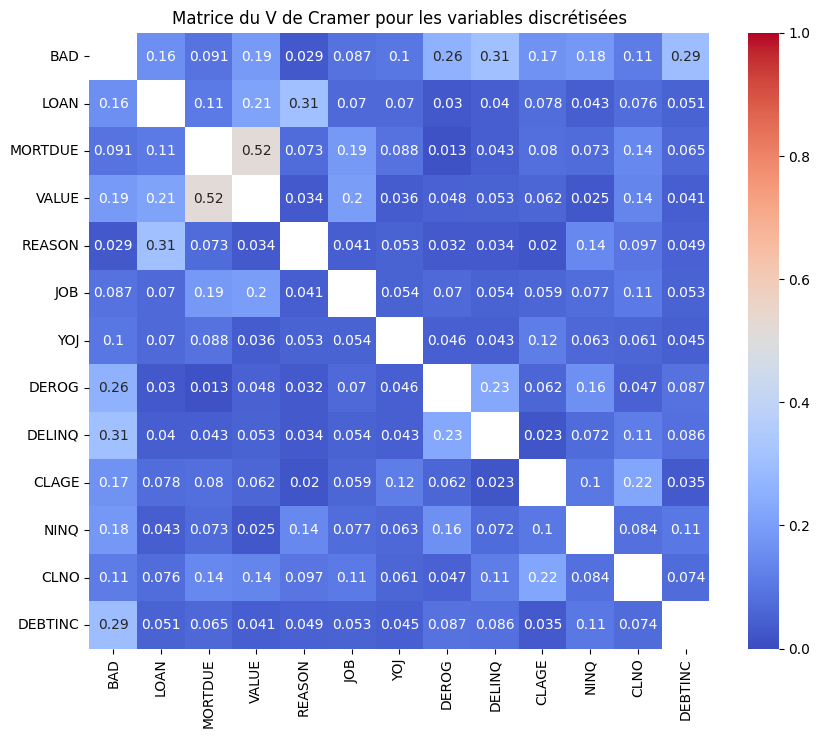

In [20]:
plt.figure(figsize=(10, 8))  
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)  
plt.title("Matrice du V de Cramer pour les variables discrétisées")
plt.show()

Calcul de l'Information Value (IV) afin d'évaluer la puissance prédictive des variables explicatives par rapport à une variable cible binaire.

In [21]:


def calculate_iv(data, feature, target):
    lst = []
    
    
    for cat in data[feature].unique():
       
        good = data[(data[feature] == cat) & (data[target] == 0)].shape[0]
        bad = data[(data[feature] == cat) & (data[target] == 1)].shape[0]
        
      
        total_good = data[data[target] == 0].shape[0]
        total_bad = data[data[target] == 1].shape[0]
        
        
        p_good = good / total_good if total_good > 0 else 0
        p_bad = bad / total_bad if total_bad > 0 else 0
        
        if p_good > 0 and p_bad > 0:
            iv = (p_good - p_bad) * np.log(p_good / p_bad)
        else:
            iv = 0
        lst.append(iv)
    
    
    iv_value = np.sum(lst)
    return iv_value

def calculate_iv_for_all(df, target):
    iv_dict = {}
    

    for col in df.columns:
        if col != target:  
            iv = calculate_iv(df, col, target)
            iv_dict[col] = iv  
    
    return iv_dict


iv_values = calculate_iv_for_all(data_train, 'BAD')


for feature, iv in iv_values.items():
    print(f"IV for {feature}: {iv}")


IV for LOAN: 0.1388723990221883
IV for MORTDUE: 0.05093352941944229
IV for VALUE: 0.18368147007028265
IV for REASON: 0.005242192979427582
IV for JOB: 0.047992181260893774
IV for YOJ: 0.06727720124425371
IV for DEROG: 0.32324832898538447
IV for DELINQ: 0.4726801137347893
IV for CLAGE: 0.18199873907703984
IV for NINQ: 0.16554164003919053
IV for CLNO: 0.06517526059668391
IV for DEBTINC: 0.6852567094114614


Rreprésentation graphique des IV des variables

L'Information Value (IV) permet de sélectionner les variables explicatives les plus pertinentes pour le modèle prédictif en évaluant leur puissance discriminante par rapport à la cible binaire. Elle aide à quantifier la qualité de chaque variable en mesurant son impact sur la prédiction. Une IV élevée indique une capacité significative à différencier les classes, tandis qu'une IV faible suggère une faible contribution. 

C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\2890134453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='IV', data=iv_df, palette='Blues_d')


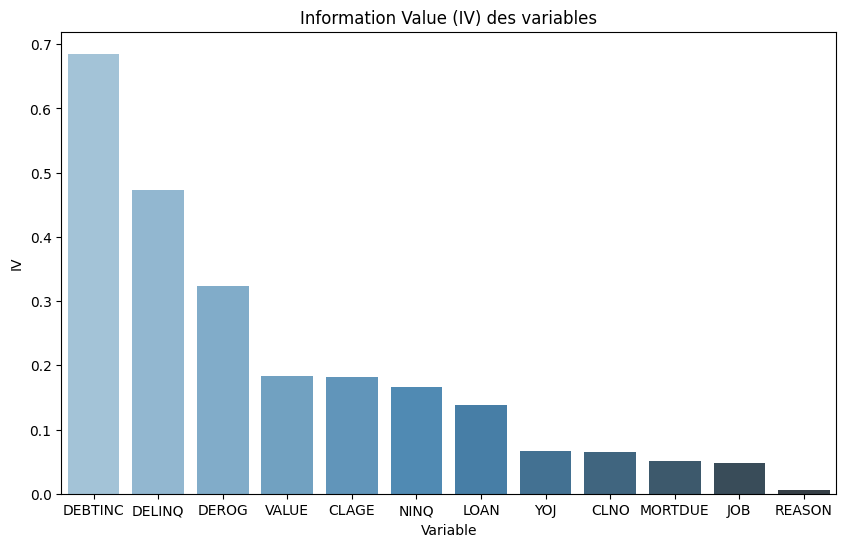

In [22]:


sorted_iv = {k: v for k, v in sorted(iv_values.items(), key=lambda item: item[1], reverse=True)}


iv_df = pd.DataFrame({
    'Variable': list(sorted_iv.keys()),
    'IV': list(sorted_iv.values())
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='IV', data=iv_df, palette='Blues_d')
plt.title('Information Value (IV) des variables')
plt.show()


Dans notre  cas,  on peut déja conclure que Reason, Job et Mortdue n'ont pas une bonne capacité predictive et donc ne pas les inclure dans le modèle.

Cependant, nous allons tout de même entraîner un modèle complet afin de nous assurer que les variables ne sont pas statistiquement significatives, et ainsi valider leur exclusion de manière plus fiable.

## Premier modèle: modèle complet

Pour chaque variable dans notre modèle, nous avons choisi une modalité de référence, en sélectionnant la **modalité la plus risquée**. Pour déterminer laquelle est la plus risquée, nous avons analysé les modalités en fonction de leur **taux de défaut** et avons pris comme référence celle présentant le taux le plus élevé.

In [23]:

formula = "BAD ~  C(DEBTINC, Treatment(reference=2)) + C(DEROG, Treatment(reference=2)) + C(REASON, Treatment(reference='DebtCon'))+\
          C(JOB, Treatment(reference=2))+ C(VALUE, Treatment(reference=1)) + C(YOJ, Treatment(reference=0)) +\
          C(CLNO, Treatment(reference=0)) + C(CLAGE, Treatment(reference=0))+ C(NINQ, Treatment(reference=2))+\
            C(DELINQ, Treatment(reference=2)) + C(LOAN, Treatment(reference=0))  - 1"

In [24]:

model_logit_complet=sm.Logit.from_formula(formula=formula,data=data_train).fit()

Optimization terminated successfully.
         Current function value: 0.363916
         Iterations 7


In [25]:
print(model_logit_complet.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                          Logit   Df Residuals:                     4150
Method:                           MLE   Df Model:                           21
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2716
Time:                        18:56:56   Log-Likelihood:                -1518.3
converged:                       True   LL-Null:                       -2084.3
Covariance Type:            nonrobust   LLR p-value:                1.802e-226
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
C(DEBTINC, Treatment(reference=2))[0]                    4.5973      0.394     11.662      0.000       3.825       5.370
C(DEB

On voit bien que les variables REASON et JOB ne sont pas statistiquement significatifss, cela  confirme  bien le fait qu'il ne soit pas nécessaire de les inclures dans le modèle

In [26]:
y_pred_complet=model_logit_complet.predict(data_test)

Plusieurs métriques à calculer

AUC

In [27]:
roc_auc_score(data_test['BAD'], y_pred_complet)

0.8351733425725287

Indice de Gini

In [28]:
2*roc_auc_score(data_test['BAD'], y_pred_complet)-1

0.6703466851450575

Étant donné que certaines variables ne sont pas significatives, nous avons décidé de les retirer pour simplifier le modèle. Pour réduire davantage la complexité, nous effectuerons une **sélection automatique des variables**. De plus, les variables **MORTDUE** et **VALUE** étant fortement corrélées, nous conserverons uniquement celle ayant la plus forte valeur prédictive pour éviter la multicolinéarité. Comme l'**Information Value** de **MORTDUE** est plus faible que celle de **VALUE**, nous choisirons de retirer **MORTDUE** du modèle.

Sélection automatique des variables avec la méthode stepwise

In [29]:


def forwardSelection(X, y, model_type="linear", elimination_criteria="aic", varchar_process="dummy_dropfirst", sl=0.05):
    # Traitement des variables catégorielles
    X = __varcharProcessing__(X, varchar_process=varchar_process)
    return __forwardSelectionRaw__(X, y, model_type=model_type, elimination_criteria=elimination_criteria, sl=sl)


def __varcharProcessing__(X, varchar_process="dummy_dropfirst"):
    dtypes = X.dtypes
    if varchar_process == "drop":
        X = X.drop(columns=dtypes[dtypes == object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X, drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X, drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == object].index.tolist())
    else:
        X = pd.get_dummies(X, drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == object].index.tolist())

   
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    return X



def __forwardSelectionRaw__(X, y, model_type="linear", elimination_criteria="aic", sl=0.05):
    iterations_log = ""
    cols = X.columns.tolist()

    
    def regressor(y, X, model_type=model_type):
        if model_type == "linear":
            return sm.OLS(y, X).fit()
        elif model_type == "logistic":
            return sm.Logit(y, X).fit()
        else:
            print(f"Model Type '{model_type}' not recognized. Defaulting to linear model.")
            return sm.OLS(y, X).fit()

    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")

    
    model = regressor(y, X[selected_cols])

    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type == "linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type == "linear":
        criteria = model.rsquared_adj

    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns=["Cols", "Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols + [j]])
            pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)

      
        pvals = pvals.sort_values(by=["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval <= sl]

        if pvals.shape[0] > 0:
            model = regressor(y, X[selected_cols + [pvals["Cols"][0]]])
            iterations_log += f"\nEntered: {pvals['Cols'][0]}\n"
            iterations_log += f"\n\n{model.summary()}\nAIC: {model.aic}\nBIC: {model.bic}\n\n"

            
            if elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print(f"Entered: {pvals['Cols'][0]} \tAIC: {model.aic}")
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    break
            elif elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print(f"Entered: {pvals['Cols'][0]} \tBIC: {model.bic}")
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    break
            elif elimination_criteria == "r2" and model_type == "linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print(f"Entered: {pvals['Cols'][0]} \tR2: {model.rsquared}")
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    break
            elif elimination_criteria == "adjr2" and model_type == "linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print(f"Entered: {pvals['Cols'][0]} \tAdjR2: {model.rsquared_adj}")
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    break
        else:
            print("Break: Significance Level")
            break

    model = regressor(y, X[selected_cols])
    print(model.summary())
    print(f"AIC: {model.aic}")
    print(f"BIC: {model.bic}")
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log


def __backwardSelectionRaw__(X, y, model_type="linear", elimination_criteria="aic", sl=0.05):
    iterations_log = ""
    last_eleminated = ""
    cols = X.columns.tolist()

    def regressor(y, X, model_type=model_type):
        if model_type == "linear":
            return sm.OLS(y, X).fit()
        elif model_type == "logistic":
            return sm.Logit(y, X).fit()
        else:
            print(f"Model Type '{model_type}' not recognized. Defaulting to linear model.")
            return sm.OLS(y, X).fit()

    model = regressor(y, X)

    for i in range(X.shape[1]):
        if i != 0:
            maxPval = max(model.pvalues)
            cols = X.columns.tolist()
            if maxPval > sl:
                for j in cols:
                    if model.pvalues[j] == maxPval:
                        print(f"Eliminated: {j}")
                        iterations_log += f"\n\nEliminated: {j}\n\n"
                        del X[j]
                        last_eleminated = j
                        break
            else:
                break

        model = regressor(y, X)
        iterations_log += f"\n{model.summary()}\nAIC: {model.aic}\nBIC: {model.bic}\n"

    print(model.summary())
    print(f"AIC: {model.aic}")
    print(f"BIC: {model.bic}")
    print("Final Variables:", cols)
    iterations_log += f"\n{model.summary()}\nAIC: {model.aic}\nBIC: {model.bic}\n"
    
    return cols, iterations_log


In [30]:

selected_columns = data_train[[ 'LOAN','VALUE','DEROG','YOJ',
       'DELINQ', 'CLAGE', 'DEBTINC','CLNO','NINQ']]


In [31]:
X=data_train[[ 'LOAN','VALUE', 'DEROG','YOJ',
       'DELINQ', 'CLAGE', 'DEBTINC','CLNO','NINQ']]

In [32]:
selected_columns, log = forwardSelection(X, data_train['BAD'], model_type="logistic", elimination_criteria="aic", varchar_process="dummy_dropfirst", sl=0.05)


print("Variables sélectionnées :", selected_columns)
print("Log des itérations :", log)

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.499604
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.488769
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.496611
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.472593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494379
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.460396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.485208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456546
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499156
         Iterations 5
Optimization te

C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.422576
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457279
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.450483
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.422576
         Iterations 6
Entered: DEBTINC 	AIC: 3531.977135892767
Optimization terminated successfully.
         Current function value: 0.411762
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.418197
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.412586
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.418347
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.405917
         Iterations 7
Optimization terminated successfully.
   

C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.416926
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.405917
         Iterations 7
Entered: CLAGE 	AIC: 3394.973538916295
Optimization terminated successfully.
         Current function value: 0.398214
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402989
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403876
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397212
         Iterations 7
Entered: DEROG 	AIC: 3324.340351714793
Opti

C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.388311
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.386085
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.386085
         Iterations 7
Entered: NINQ 	AIC: 3235.4954083663583
Optimization terminated successfully.
         Current function value: 0.385333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384808
         Iterations 7


C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.384708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384708
         Iterations 7
Entered: CLNO 	AIC: 3226.0001580945
Optimization terminated successfully.
         Current function value: 0.384204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383459
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383459
         Iterations 7
Entered: YOJ 	AIC: 3217.580568800329


C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
C:\Users\lamou\AppData\Local\Temp\ipykernel_37508\303474993.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.382953
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382953
         Iterations 7
Entered: VALUE 	AIC: 3215.358325083914
Break: Significance Level
Optimization terminated successfully.
         Current function value: 0.382953
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                          Logit   Df Residuals:                     4162
Method:                           MLE   Df Model:                            9
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2335
Time:                        18:56:58   Log-Likelihood:                -1597.7
converged:                       True   LL-Null:                       -2084.3
Covariance Type:            nonrobust   LLR p-value:                9.670e-2

Nous sélectionnons la combinaison de variables qui minimise au maximum les critères AIC et BIC en appliquant la méthode de sélection stepwise. Cette approche itérative permet de construire un modèle en ajoutant ou retirant des variables à chaque étape, en fonction de leur contribution à la réduction des critères AIC et BIC.

In [33]:
formula_final = "BAD ~  C(DEBTINC, Treatment(reference=2)) + C(DEROG, Treatment(reference=2)) +\
           C(LOAN, Treatment(reference=0))+\
          C(CLAGE, Treatment(reference=0))+ C(VALUE, Treatment(reference=1))+\
            C(DELINQ, Treatment(reference=2)) - 1"

In [34]:

model_logit_final=sm.Logit.from_formula(formula=formula_final,data=data_train).fit()

Optimization terminated successfully.
         Current function value: 0.374450
         Iterations 7


In [35]:
print(model_logit_final.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                          Logit   Df Residuals:                     4159
Method:                           MLE   Df Model:                           12
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2505
Time:                        18:56:58   Log-Likelihood:                -1562.2
converged:                       True   LL-Null:                       -2084.3
Covariance Type:            nonrobust   LLR p-value:                5.627e-216
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
C(DEBTINC, Treatment(reference=2))[0]      3.3106      0.343      9.659      0.000       2.639       3.982
C(DEBTINC, Treatment(reference=2))[1]      5.09

In [36]:
predict_test_final=model_logit_final.predict(data_test)

In [37]:
predict_test_final

0       0.035765
1       0.046549
2       0.729258
3       0.380063
4       0.846477
          ...   
1783    0.148176
1784    0.100704
1785    0.148176
1786    0.028514
1787    0.028514
Length: 1788, dtype: float64

In [38]:
predict_train_final=model_logit_final.predict(data_train)

AUC

L’AUC (Area Under the Curve), ou aire sous la courbe ROC, évalue la capacité d’un modèle de classification binaire à différencier deux classes, comme les "bons" et "mauvais" payeurs dans le scoring de crédit. Elle mesure la surface sous la courbe ROC, qui est tracée en fonction du Taux de Faux Positifs (FPR) et du Taux de Vrais Positifs (TPR) pour divers seuils de classification. Une AUC entre 0,8 et 0,9 reflète une bonne performance du modèle avec une bonne capacité de discrimination.

In [39]:
auc_test=roc_auc_score(data_test['BAD'], predict_test_final)
auc_test

0.829255951157542

Indice de Gini

L'indice de Gini, calculé à partir de l'AUC (aire sous la courbe ROC), mesure la capacité de discrimination d'un modèle de classification.Plus l'indice de Gini est élevé, plus le modèle est capable de distinguer les classes (comme les "bons" vs. "mauvais" payeurs.Un Gini supérieur à 0,6 est souvent considéré comme performant.

In [40]:
gini_test=2*roc_auc_score(data_test['BAD'], predict_test_final)-1 
gini_test

0.658511902315084

Construction de la matrice de confusion

Pour construire la matrice de confusion, il est nécessaire de convertir les probabilités prédites en classes binaires. Pour ce faire, nous avons choisi au hasard un seuil de 0,5, permettant ainsi de classer les probabilités supérieures ou égales à 0,5 comme appartenant à la classe 1, et les probabilités inférieures comme appartenant à la classe 0.

In [41]:
y_test=data_test['BAD']

In [42]:
y_train=data_train['BAD']

In [43]:
predict_test_class = [1 if prob >= 0.5 else 0 for prob in predict_test_final]

In [44]:
predict_train_class = [1 if prob >= 0.5 else 0 for prob in predict_train_final]

In [45]:

cm = confusion_matrix(y_test, predict_test_class)


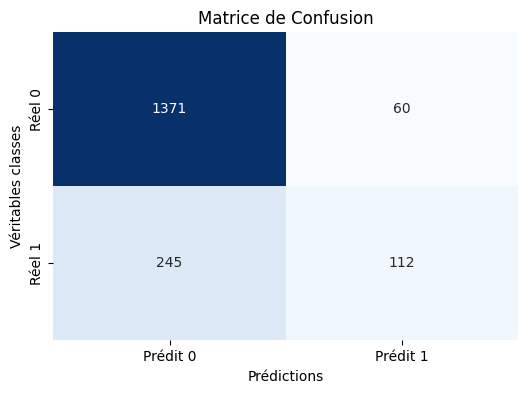

In [46]:

plt.figure(figsize=(6,4)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Prédit 0', 'Prédit 1'], 
            yticklabels=['Réel 0', 'Réel 1'])  

plt.ylabel('Véritables classes')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion')

plt.show()

Courbe ROC AUC

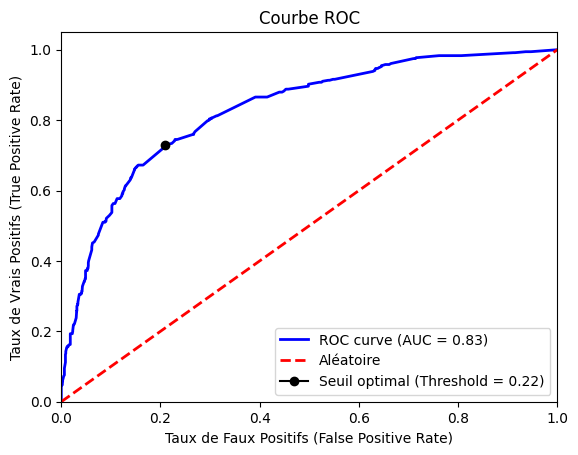

In [47]:

fpr, tpr, thresholds = roc_curve(y_test, predict_test_final)
auc_test = auc(fpr, tpr)

# Calcul du seuil optimal
optimal_idx = (tpr - fpr).argmax()  # Indice où la différence TPR - FPR est maximale
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label="Aléatoire")

plt.plot(optimal_fpr, optimal_tpr, marker='o', color='black', label=f'Seuil optimal (Threshold = {optimal_threshold:.2f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")

plt.show()


Grâce à l’analyse de la courbe ROC et de l’AUC, nous avons pu identifier un seuil optimal qui maximise l'équilibre entre le taux de vrais positifs et le taux de faux positifs. En utilisant ce seuil optimal, nous avons choisi de découper les probabilités en deux classes, ce qui améliore la performance du modèle en optimisant la classification entre les classes 0 et 1.

In [48]:
predict_train_class_2 = [1 if prob >= 0.2 else 0 for prob in predict_train_final]
predict_test_class_2 = [1 if prob >= 0.2 else 0 for prob in predict_test_final]

cm_2 = confusion_matrix(y_test, predict_test_class_2)


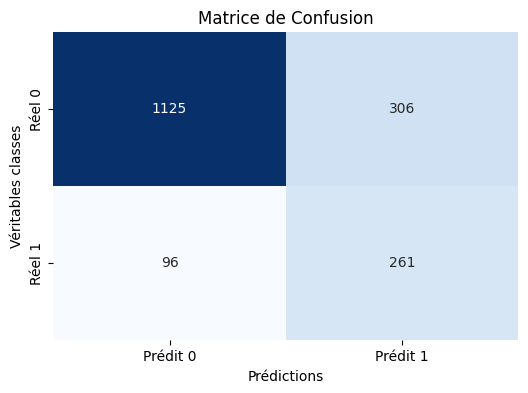

In [49]:

plt.figure(figsize=(6,4)) 
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Prédit 0', 'Prédit 1'], 
            yticklabels=['Réel 0', 'Réel 1'])  

plt.ylabel('Véritables classes')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion')

plt.show()

En utilisant le seuil optimal déterminé grâce à la courbe ROC, nous observons une meilleure distinction entre les vrais positifs et les faux positifs. Ce seuil optimal maximise la précision de notre modèle, permettant une séparation plus efficace des classes en minimisant les erreurs de classification.

On calcule aussi l'AUC du data_train afin de procéder à une comparaison

In [50]:
y_pred_final_train=model_logit_final.predict(data_train)

In [51]:
auc_train=roc_auc_score(data_train['BAD'], y_pred_final_train)

Comparaison des courbes ROC AUC

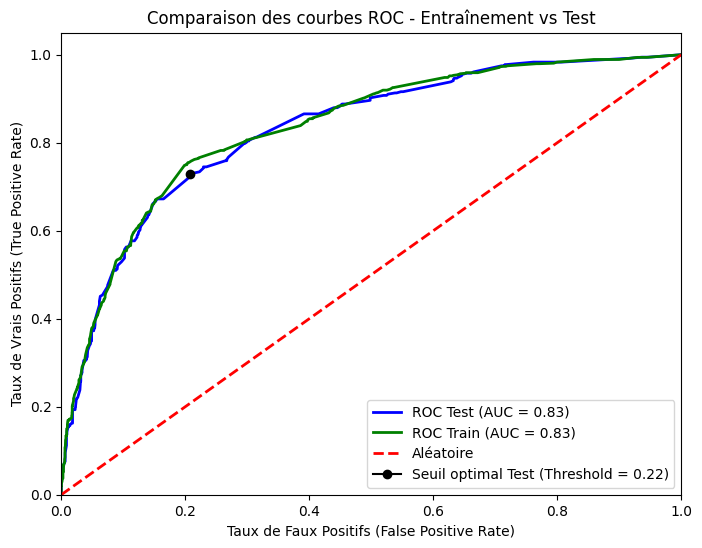

In [52]:

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predict_test_final)
auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predict_train_final)
auc_train = auc(fpr_train, tpr_train)


optimal_idx_test = (tpr_test - fpr_test).argmax()
optimal_threshold_test = thresholds_test[optimal_idx_test]
optimal_fpr_test = fpr_test[optimal_idx_test]
optimal_tpr_test = tpr_test[optimal_idx_test]


plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC Test (AUC = {auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC Train (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label="Aléatoire")

# Ajout du point de seuil optimal pour le test
plt.plot(optimal_fpr_test, optimal_tpr_test, marker='o', color='black', label=f'Seuil optimal Test (Threshold = {optimal_threshold_test:.2f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Comparaison des courbes ROC - Entraînement vs Test')
plt.legend(loc="lower right")


plt.show()


Calcul  des métriques pour l'ensemble d'entrainement et de test

In [53]:


#Ensemble d'entrainement
precision_train = precision_score(y_train, predict_train_class_2)
recall_train = recall_score(y_train, predict_train_class_2)
f1_train = f1_score(y_train, predict_train_class_2)
log_loss_train = log_loss(y_train, predict_train_final, normalize=True, sample_weight=None, labels=None)


#Ensemble de test
precision_test = precision_score(y_test, predict_test_class_2)
recall_test = recall_score(y_test,  predict_test_class_2)
f1_test = f1_score(y_test,  predict_test_class_2)
log_loss_test = log_loss(y_test, predict_test_final, sample_weight=None, labels=None)


results_df = pd.DataFrame({
    'Métrique': ['Precision', 'Recall', 'F1-Score', 'Log Loss'],
    'Entraînement': [precision_train, recall_train, f1_train, log_loss_train],
    'Test': [precision_test, recall_test, f1_test, log_loss_test]
})
print("Métriques du modèle de régression logistique")
results_df


Métriques du modèle de régression logistique


,Métrique,Entraînement,Test
0,Precision,0.477567,0.460317
1,Recall,0.754808,0.731092
2,F1-Score,0.585002,0.564935
3,Log Loss,0.374450,0.378787


# Construction  de la grille de score

La fonction grid_score crée une grille d'évaluation pour chaque modalité des variables du modèle de régression logistique, fournissant ainsi un score pour chaque catégorie de modalité, une pondération, une contribution au modèle et le taux de défaut associé.

In [54]:


def grid_score(data_train, results_model_logit, variables_utilisees, TARGET) -> pd.DataFrame:
    index_logit = list(results_model_logit.params.index)

    variables_logit = []
    modalites_variables = []

    for ligne in index_logit:
        variable = ligne.split(",")[0].replace("C(", "")
        variables_logit.append(variable)

        modalite = ligne.split("[")[-1].replace("]", "")
        if "T.Interval" in modalite:
            modalite = modalite.replace("T.Interval", "")
        if ", closed='right'" in modalite:
            modalite = modalite.replace(", closed='right')", "]")
        if "T." in modalite:
            modalite = modalite.replace("T.", "")
        modalites_variables.append(modalite)

    
    if len(variables_logit) != len(modalites_variables) or len(variables_logit) != len(list(results_model_logit.params)) or len(variables_logit) != len(list(results_model_logit.pvalues)):
        raise ValueError("Les longueurs des listes des variables, modalités, coefficients, et p-values ne correspondent pas")

    
    df_coef = pd.DataFrame({
        'Variable': variables_logit,
        'Modalités': modalites_variables,
        'Coefficient': list(results_model_logit.params),
        'p-value': list(results_model_logit.pvalues)
    })

    
    grid = {'Variable': [], 'Modalités': [], 'effectif': []}
    for var in variables_utilisees:
        for modalite in data_train[var].value_counts().reset_index()[var].unique():
            grid['Variable'].append(var)
            grid['Modalités'].append(modalite)
            effectif_pct = data_train[var].value_counts(normalize=True)[modalite]
            grid['effectif'].append(effectif_pct)
    
    grid = pd.DataFrame(grid)
    grid['Modalités'] = grid['Modalités'].apply(str)

   
    grid['Coefficient'] = 0
    grid_df = pd.merge(grid.drop(columns='Coefficient'), df_coef, on=['Variable', 'Modalités'], how='outer')
    
    grid_df = grid_df.pivot_table(index=['Variable', 'Modalités'], values=['effectif', 'Coefficient', 'p-value'], aggfunc='sum')
    grid_df = grid_df.reset_index()

    grid_df['Modalités'] = grid_df['Modalités'].apply(str)
    grid_df = grid_df.drop_duplicates(subset=['Variable', 'Modalités'], keep='last').reset_index(drop=True)

  
    notes = []
    sum_diff = sum([coefficients.max() - coefficients.min() for variable, coefficients in grid_df.groupby('Variable')['Coefficient']])

    for index, row in grid_df.iterrows():
        variable = row['Variable']
        coefficients_variable = grid_df.loc[grid_df['Variable'] == variable, 'Coefficient']
        note = 1000 * ((coefficients_variable.max() - row['Coefficient']) / sum_diff)
        notes.append(note)

    grid_df['Note'] = notes

   
    for var in grid_df['Variable'].unique():
        for modal in grid_df[grid_df['Variable'] == var]['Modalités'].unique():
            tmp = data_train[var].value_counts(normalize=True)
            if modal in tmp.index.astype(str):  # Vérifier si la modalité est présente
                proportion = tmp[tmp.index.astype(str) == modal].iloc[0]
                grid_df.loc[(grid_df['Variable'] == var) & (grid_df['Modalités'] == modal), 'effectif'] = proportion

    
    moyennes = {}
    contributions = []
    for var in grid_df['Variable'].unique():
        moyennes[var] = grid_df[grid_df['Variable'] == var]['Note'].mean()

    denominator = np.sum([np.sqrt(np.sum([(row['effectif'] * (row['Note'] - moyennes[var])**2) for _, row in grid_df.loc[grid_df['Variable'] == var].iterrows()])) for var in grid_df['Variable'].unique()])

    for index, row in grid_df.iterrows():
        variable = row['Variable']
        mean_note = moyennes[variable]
        numerator = np.sqrt(np.sum([(row['effectif'] * (row['Note'] - mean_note)**2) for _, row in grid_df.loc[grid_df['Variable'] == variable].iterrows()]))
        contribution = numerator / denominator
        contributions.append(contribution * 100)

    grid_df['Contribution'] = contributions

    
    tx_df = {'Variable': [], 'Modalités': [], 'tx_defaut': []}
    for var in grid_df['Variable'].unique():
        for modalite in grid_df[grid_df['Variable'] == var]['Modalités'].unique():
            defauts = data_train[data_train[var].apply(str) == modalite][TARGET].sum()
            tout_lemonde = data_train[data_train[var].apply(str) == modalite][TARGET].shape[0]
            if tout_lemonde > 0: 
                tx_defaut = (defauts / tout_lemonde) * 100
            else:
                tx_defaut = 0
            tx_df['Variable'].append(var)
            tx_df['Modalités'].append(modalite)
            tx_df['tx_defaut'].append(tx_defaut)

    tx_df = pd.DataFrame(tx_df)
    Grille_score = pd.merge(grid_df, tx_df, on=['Variable', 'Modalités'], how='left')

    Grille_score['Contribution'] = Grille_score['Contribution'].apply(lambda row: round(row, 2))
    Grille_score['Note'] = Grille_score['Note'].apply(lambda row: round(row))
    Grille_score['tx_defaut'] = Grille_score['tx_defaut'].apply(lambda row: round(row, 2))
    Grille_score['Coefficient'] = Grille_score['Coefficient'].apply(lambda row: round(row, 4))
    Grille_score['p-value'] = Grille_score['p-value'].apply(lambda row: round(row, 3))
    Grille_score['effectif'] = Grille_score['effectif'].apply(lambda row: round(row * 100, 1))

    return Grille_score


liste_variables_utilisees = ['LOAN', 'MORTDUE', 'JOB', 'DEROG', 'DELINQ', 'CLAGE', 'DEBTINC','YOJ']
grille = grid_score(data_train, model_logit_final, liste_variables_utilisees, 'BAD')
grille


,Variable,Modalités,Coefficient,effectif,p-value,Note,Contribution,tx_defaut
0,CLAGE,0,0.0000,5.1,0.0,0,16.01,38.86
1,CLAGE,1,-0.9276,53.7,0.0,108,16.01,23.67
2,CLAGE,2,-1.6428,41.3,0.0,191,16.01,12.78
3,DEBTINC,0,3.3106,39.3,0.0,288,28.27,5.74
4,DEBTINC,1,5.0901,55.7,0.0,81,28.27,28.14
5,DEBTINC,2,5.7862,5.0,0.0,0,28.27,40.19
6,DELINQ,0,-1.7327,77.0,0.0,202,23.23,14.13
7,DELINQ,1,-0.9504,13.1,0.0,111,23.23,28.70
8,DELINQ,2,0.0000,9.9,0.0,0,23.23,53.77
9,DEROG,0,-1.4703,85.1,0.0,171,17.66,16.16


In [55]:
def attribuer_note(data, grille_score, variables_utilisees):
   
    data['Note_totale'] = 0


    for var in variables_utilisees:
        
        grille_var = grille_score[grille_score['Variable'] == var][['Modalités', 'Note']]
        
       
        data[var] = data[var].astype(str)
        grille_var['Modalités'] = grille_var['Modalités'].astype(str)

        
        notes_dict = dict(zip(grille_var['Modalités'], grille_var['Note']))
        
       
        data['Note_totale'] += data[var].map(notes_dict).fillna(0)  

    return data




In [56]:
# Utilisation de la fonction pour attribuer une note à chaque individu
data_train_avec_notes = attribuer_note(data_train, grille, liste_variables_utilisees)


In [57]:
data_train_avec_notes.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Note_totale
0,0,2,2,2,DebtCon,2,1,0,0,1,0,0,1,677
1,0,1,1,1,DebtCon,0,1,0,0,2,0,1,0,939
2,1,1,2,2,DebtCon,0,1,0,0,1,1,1,1,649
3,0,2,0,0,HomeImp,1,1,0,0,2,0,2,2,679
4,1,2,2,2,DebtCon,2,1,1,2,2,0,1,1,518


In [58]:
# Utilisation de la fonction pour attribuer une note à chaque individu
data_test_avec_notes = attribuer_note(data_test, grille, liste_variables_utilisees)


In [59]:
data_test_avec_notes.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Note_totale
0,0,1,2,2,DebtCon,1,1,0,0,1,0,1,0,856
1,0,1,1,0,DebtCon,1,0,0,0,1,0,1,0,856
2,1,1,0,1,DebtCon,1,1,0,1,1,0,1,1,558
3,1,0,0,0,HomeImp,1,0,0,0,1,0,1,1,562
4,1,2,0,1,DebtCon,0,0,0,2,1,0,1,1,475


Le test de Kolmogorov-Smirnov (KS) est utilisé pour évaluer si deux distributions de données diffèrent significativement l'une de l'autre. Dans le contexte de scoring et de discrimination de scores, ce test est particulièrement utile pour évaluer la capacité d’un modèle à distinguer entre deux groupes, comme les bons et les mauvais payeurs.Un KS entre 0,2 à 0,4 indique une bonne capacité discriminante du modèle.

In [60]:

ks_2samp(data1=data_train.loc[data_train["BAD"]==0,"Note_totale"], data2=data_train.loc[data_train["BAD"]==1,"Note_totale"],)

KstestResult(statistic=0.5215914325195762, pvalue=3.935371141125161e-167, statistic_location=649, statistic_sign=-1)

In [61]:
def plot_ecdf_for_ks(data,target,variable):
    plt.figure(figsize=(8, 6))

    sns.ecdfplot(data=data.loc[data[target]==0,"Note_totale"], label='GOOD', color='green')

    sns.ecdfplot(data=data.loc[data[target]==1,"Note_totale"], label='BAD', color='red')


    plt.title('Comparaison des fonctions de distribution cumulée (ECDF) des notes')
    plt.xlabel('Valeurs')
    plt.ylabel('Probabilité cumulée')
    plt.legend()
    ks_stat, p_value = ks_2samp(data.loc[data[target] == 0, variable], data.loc[data[target] == 1, variable])


    plt.text(0.7, 0.05, f"KS Statistic: {ks_stat:.4f}\nP-value: {p_value:.4f}",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.7))

    plt.show()


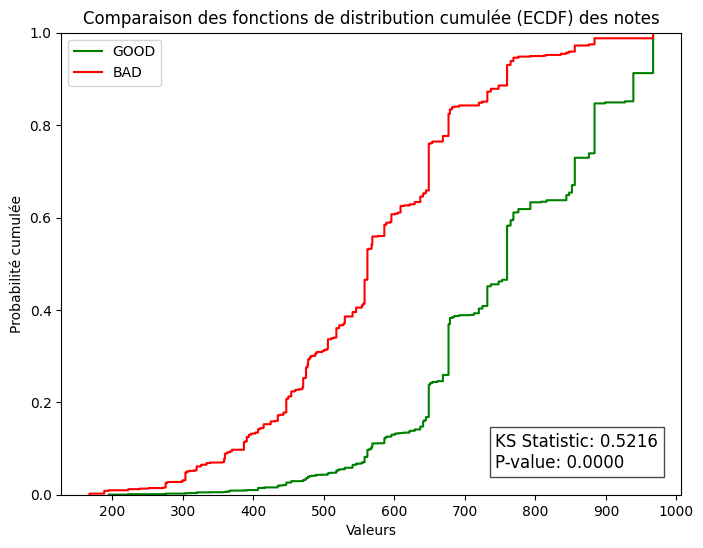

In [62]:
plot_ecdf_for_ks(data_train,'BAD','Note_totale')

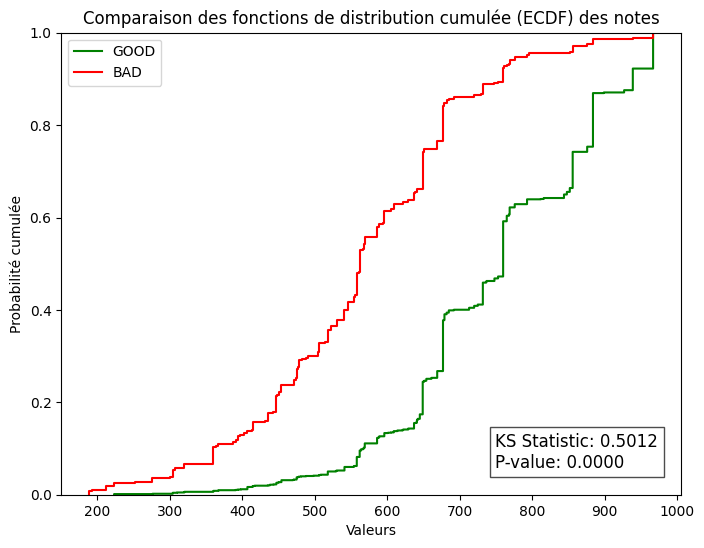

In [63]:
plot_ecdf_for_ks(data_test,'BAD','Note_totale')

Segmentation du score en décile

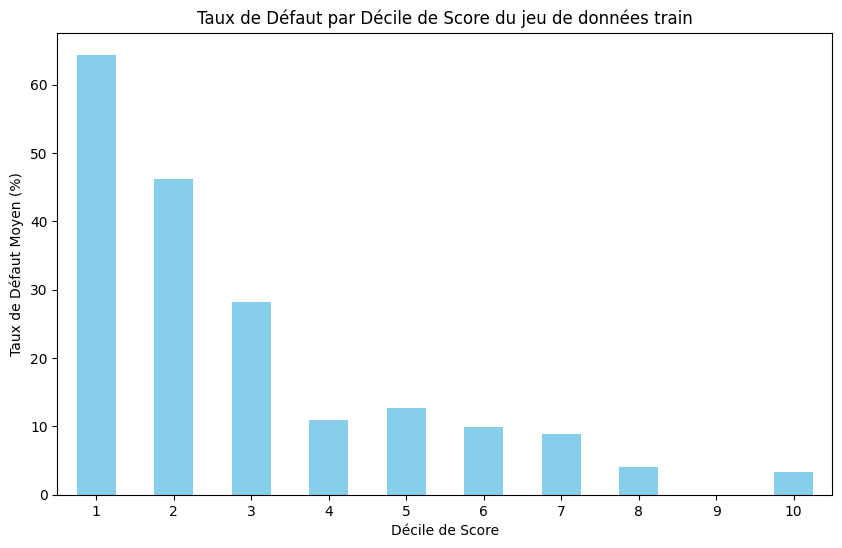

In [64]:

data_train_avec_notes['decile'] = pd.qcut(data_train_avec_notes['Note_totale'], 10, labels=False, duplicates="drop") + 1 

default_rate_by_decile = data_train_avec_notes.groupby('decile')['BAD'].mean() * 100


plt.figure(figsize=(10, 6))
default_rate_by_decile.plot(kind='bar', color='skyblue')
plt.xlabel('Décile de Score')
plt.ylabel('Taux de Défaut Moyen (%)')
plt.title('Taux de Défaut par Décile de Score du jeu de données train')
plt.xticks(rotation=0)
plt.show()


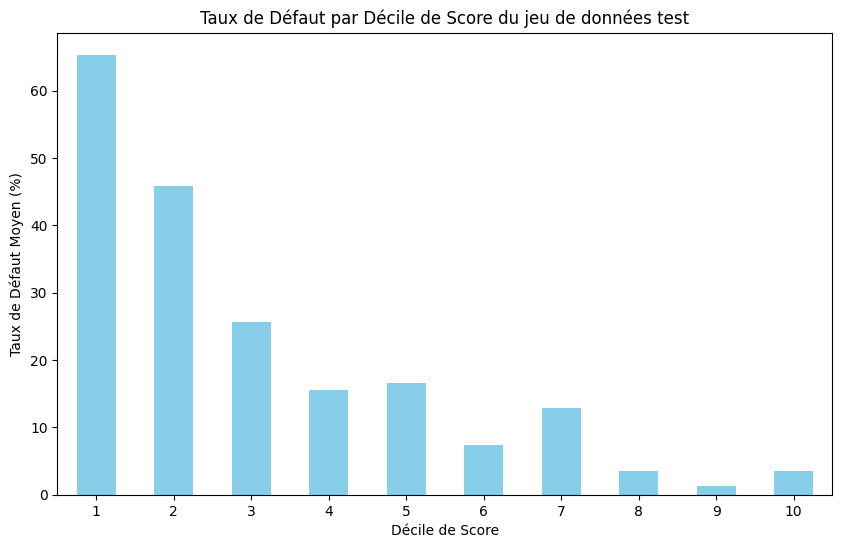

In [65]:

data_test_avec_notes['decile'] = pd.qcut(data_test_avec_notes['Note_totale'], 10, labels=False, duplicates="drop") + 1 

default_rate_by_decile = data_test_avec_notes.groupby('decile')['BAD'].mean() * 100


plt.figure(figsize=(10, 6))
default_rate_by_decile.plot(kind='bar', color='skyblue')
plt.xlabel('Décile de Score')
plt.ylabel('Taux de Défaut Moyen (%)')
plt.title('Taux de Défaut par Décile de Score du jeu de données test')
plt.xticks(rotation=0)
plt.show()


# FIN